# Polynomial regression
### Sung-ju Kim
https://goddoe.github.io
- - -

## Content
1. Prepare pseudo data
2. Make model & Design cost function & optimizer
3. Train & Draw graph
- - -

## 1. Prepare pseudo data

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
%matplotlib inline
plt.style.use('ggplot')

In [2]:
def pseudo_function(x, x_i, n_data):
    n_wave = 5
    exp_max = 1
    exp_min = -1
    bias = 0.5
    a = 1.5
    
    radian_unit = (np.pi * n_wave) / n_data
    exp_unit = (exp_max - exp_min) / n_data 
    
    y = np.sin(x_i*radian_unit)* np.exp(exp_max-(exp_unit*x_i)) + bias + a*x
    
    return y

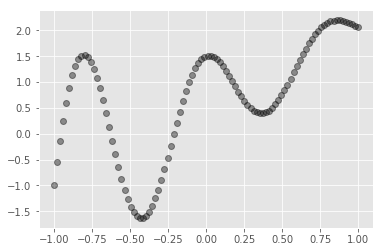

In [3]:
n_data = 100
x_range = (-1, 1)

X_train = np.linspace(-1, 1, n_data,dtype=np.float32)
Y_train = np.array([pseudo_function(x,x_i,n_data) for x_i, x in enumerate(list(X_train))], dtype=np.float32)
plt.cla()
plt.plot(X_train, Y_train, 'ro', alpha=0.4, color='black')

In [4]:
# reshape for model
X_train = np.reshape(X_train, newshape=[-1,1])
Y_train = np.reshape(Y_train, newshape=[-1,1])
print("X_train shape : {}\nY_train shape : {}".format(np.shape(X_train), np.shape(X_train)))

X_train shape : (100, 1)
Y_train shape : (100, 1)


## 2. Make model & Design cost function & optimizer

In [5]:
with tf.variable_scope('variable'):
    X = tf.placeholder(dtype=tf.float32, 
                       shape=[None,1],
                       name="X")
    Y = tf.placeholder(dtype=tf.float32,
                       shape=[None,1],
                       name="Y")
    learning_rate = tf.placeholder(dtype=tf.float32, name='learning_rate')

In [6]:
with tf.variable_scope('polynomial_model'):
    # declaration of model
    
    num_of_degree = 3
    
    Y_pred = X
    for i in range(num_of_degree):
        W = tf.get_variable(name="degree_{}".format(i),
                            shape=[1,1],
                            dtype=tf.float32,
                            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.02))

        Y_pred += tf.matmul(tf.pow(X, i),W)

    b = tf.get_variable(name="b",
                    shape=[1],
                    dtype=tf.float32,
                    initializer=tf.constant_initializer())
    
    Y_pred += b
    
    # optimization
    cost = tf.reduce_mean(tf.squared_difference(Y_pred, Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    init = tf.global_variables_initializer()

## 3. Train & Draw graph

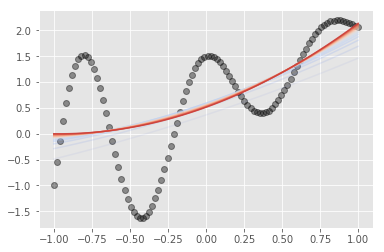

In [7]:
lr = 0.001
n_epoch = 3000

draw_interval = 200
plt.cla()
plt.plot(X_train, Y_train, 'ro', alpha=0.4, label="origin", color="black")

cmap = plt.get_cmap('coolwarm')
c_norm = colors.Normalize(vmin=0, vmax=n_epoch)
scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)

sess = tf.Session() 
sess.run(init)
for epoch_i in range(n_epoch):
    _ = sess.run(optimizer, feed_dict={X:X_train, 
                                   Y:Y_train, 
                                   learning_rate:lr})
    if epoch_i % draw_interval == 0 :
        X_show = X_train.copy()
        Y_show = sess.run(Y_pred, 
                          feed_dict={X:X_show})
        
        plt.plot(X_show, Y_show, alpha=epoch_i/n_epoch, color=scalar_map.to_rgba(epoch_i))
        

## more degree

In [8]:
tf.reset_default_graph()

In [9]:
with tf.variable_scope('variable'):
    X = tf.placeholder(dtype=tf.float32, 
                       shape=[None,1],
                       name="X")
    Y = tf.placeholder(dtype=tf.float32,
                       shape=[None,1],
                       name="Y")
    learning_rate = tf.placeholder(dtype=tf.float32, name='learning_rate')
    
with tf.variable_scope('polynomial_model'):
    # declaration of model
    
    num_of_degree = 7
    
    Y_pred = X
    for i in range(num_of_degree):
        W = tf.get_variable(name="degree_{}".format(i),
                            shape=[1,1],
                            dtype=tf.float32,
                            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.02))

        Y_pred += tf.matmul(tf.pow(X, i),W)

    b = tf.get_variable(name="b",
                    shape=[1],
                    dtype=tf.float32,
                    initializer=tf.constant_initializer())
    
    Y_pred += b
    
    # optimization
    cost = tf.reduce_mean(tf.squared_difference(Y_pred, Y))
    optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)
    init = tf.global_variables_initializer()

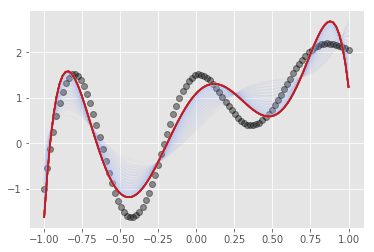

In [10]:
lr = 0.05
n_epoch = 10000

draw_interval = 200
plt.cla()
plt.plot(X_train, Y_train, 'ro', alpha=0.4, label="origin", color="black")

cmap = plt.get_cmap('coolwarm')
c_norm = colors.Normalize(vmin=0, vmax=n_epoch)
scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)

sess = tf.Session() 
sess.run(init)
for epoch_i in range(n_epoch):
    _ = sess.run(optimizer, feed_dict={X:X_train, 
                                   Y:Y_train, 
                                   learning_rate:lr})
    if epoch_i % draw_interval == 0 :
        X_show = X_train.copy()
        Y_show = sess.run(Y_pred, 
                          feed_dict={X:X_show})
        
        plt.plot(X_show, Y_show, alpha=epoch_i/n_epoch, color=scalar_map.to_rgba(epoch_i))
        